## 1. What are the main motivations for reducing a dataset's dimensionality? What are the main drawbacks?

Make it easier for the next models to work on lower dimension datasets, increasing speed, and avoiding overfitting resulting from high dimension datasets.

The main drawbacks are loosing a bit of information, result of reducing variance for example; this also leads to loosing information when recovering the initial dataset in the same proportion the variance was reduced. 

## 2. What is the curse of dimensionality?

It is the name given to the problems of having several dimensions in our dataset. These problems are:

1. Exponential growth in data volumen. As number of dimensions increase, we need much more data to represent the same information.
2. Data sparsity. As dimensions increase, the data density dicreases, making it harder for models to find patterns.
3. Computational cost. As dimensions increase, we need different algorithms to tackle these new dimensions.

## 3. Once a dataset's dimensionality has been reduced, is it possible to reverse the operation? If so, how? If not, why?

Yes, the operation can be reversed. For example, we execute a dot product, and so, we can reverse it by making the dot product of the transposed matrix. We will loose the same variance the selected hyperplane lets us reduce in the first operation

## 4. Can PCA be used to reduce the dimensionality of a highly non linear dataset?

Yes, it can, by removing useless dimensions. If there are no useless dimensions, we end up losing too much information by using PCA, because we will be squashing the information and not "unrolling" it, as it happens with the swiss roll.

## 5. Suppose you perform PCA on a 1,000-dimensional dataset, setting the explained variance ratio to 95%. How many dimensions will the resulting dataset have?

It depends on the data. We must choose the number of dimensions that add up to a sufficient variance, in this case 95%. 

Example:

609


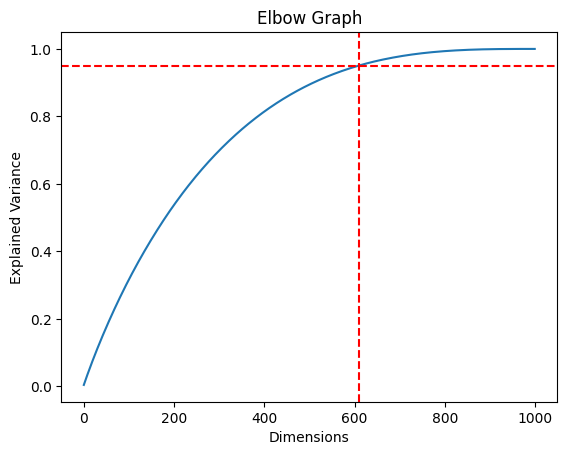

In [2]:
# Import np and PCA from sklearn

import numpy as np
from sklearn.decomposition import PCA

# Create a numpy array of 1000 dimensions, with a variance of 0.7
data = np.random.normal(0, 0.7, (1000, 1000))

pca = PCA()
pca.fit(data)
cumsum = np.cumsum(pca.explained_variance_ratio_)

min_variance = 0.95
d = np.argmax(cumsum >= min_variance) + 1
print(d)

# Plot the elbow graph with a tick at the point where the variance is 95%
import matplotlib.pyplot as plt
plt.plot(cumsum)
plt.xlabel('Dimensions')
plt.ylabel('Explained Variance')
plt.title('Elbow Graph')
plt.axhline(y=min_variance, color='r', linestyle='--')
plt.axvline(x=d, color='r', linestyle='--')

plt.show()

## 6. In what cases would you use vanilla PCA, Incremental PCA, Randomized PCA, or Kernel PCA?

Incremental PCA is used when the whole dataset does not fit into memory; Randomized PCA can be used to make the computation faster by finding the first principal components by approximation; and Kernel PCA for when you need unsupervised learning and multiples approaches by using different kernels.

## 7. How can you evaluate the performance of a dimensionality reduction algorithm on your dataset?

By measuring the reconstruction error for example by making a reverse transformation. 
If we are using dim-red as a preprocessing step, we can measure the model evaluation used after the dim-red.

## 8. Does it make any sense to chain two different dimensionality reduction algorithms?

Yes, it makes sense. We can use PCA first to quickly get rid of useless dimensions, and the LLE to slowly reduce dimensions. This can be done too by using only LLE.


## 9. Load the MNIST dataset (introduced in Chapter 3), and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing). Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set. Next, use PCA to reduce the dataset's dimensionality, with an explained variance ratio of 95%. Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next, evaluate the classifier on the test set: how does it compare to the previous classifier?


In [4]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()


c:\Users\Fco\miniconda3\envs\handsonml\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
X, y = mnist['data'], mnist['target']

X = X.values
y = y.values

# Split the MNIST dataset into training and test sets, 60000 and 10000 respectively

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Print dimensions
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [24]:
# Train a Random Forest Classifier on the training set
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

cv = GridSearchCV(RandomForestClassifier(random_state=42), {'n_estimators': [10, 50, 100]}, cv=3, verbose=2)

cv.fit(X_train, y_train)
rnd_clf = cv.best_estimator_
rnd_clf.fit(X_train, y_train)

acc = accuracy_score(y_test, rnd_clf.predict(X_test))
print(acc)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END ....................................n_estimators=10; total time=   2.5s
[CV] END ....................................n_estimators=10; total time=   2.4s
[CV] END ....................................n_estimators=10; total time=   2.5s
[CV] END ....................................n_estimators=50; total time=  11.7s
[CV] END ....................................n_estimators=50; total time=  11.7s
[CV] END ....................................n_estimators=50; total time=  11.8s
[CV] END ...................................n_estimators=100; total time=  23.5s
[CV] END ...................................n_estimators=100; total time=  23.0s
[CV] END ...................................n_estimators=100; total time=  23.0s
0.9705


In [25]:
# Print the best parameters and the accuracy
print(cv.best_params_)
print(acc)

{'n_estimators': 100}
0.9705


In [33]:
# Now use PCA to reduce the dimensions of the dataset to 95% variance, then print the dimensions

from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

print(X_train_reduced.shape)
print(X_test_reduced.shape)


(60000, 154)
(10000, 154)


(-0.5, 27.5, 27.5, -0.5)

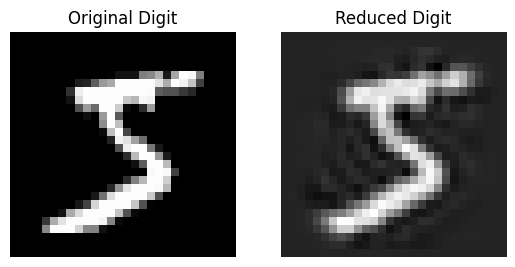

In [34]:
digit_org = X_train[0]
digit_reduced = pca.inverse_transform(X_train_reduced[0])

# Plot the original and reduced digits
import matplotlib.pyplot as plt

plt.subplot(121)
plt.imshow(digit_org.reshape(28, 28), cmap='gray')
plt.title('Original Digit')
plt.axis('off')

plt.subplot(122)
plt.imshow(digit_reduced.reshape(28, 28), cmap='gray')
plt.title('Reduced Digit')
plt.axis('off')

In [35]:
# Add PCA as a preprocessing step to the Random Forest Classifier. Use pipeline to chain the PCA and Random Forest Classifier

from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('pca', PCA(n_components=0.95)),
    ('rnd_clf', RandomForestClassifier(random_state=42))
], verbose=True)

pipe.fit(X_train, y_train)

acc = accuracy_score(y_test, pipe.predict(X_test))
print(acc)

[Pipeline] ............... (step 1 of 2) Processing pca, total=   3.8s
[Pipeline] ........... (step 2 of 2) Processing rnd_clf, total= 2.3min
0.9481


## 10. Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the result using Matplotlib. You can use a scatterplot using 10 different colors to represent each image's target class. Alternatively, you can write colored digits at the location of each instance, or even plot scaled-down versions of the digit images themselves (if you plot all digits, the visualization will be too cluttered, so you should either draw a random sample or plot an instance only if no other instance has already been plotted at a close distance). You should obtain a nice visualization of the MNIST dataset in two dimensions. Try using other dimensionality reduction algorithms such as PCA, LLE, or MDS and compare the resulting visualizations.


In [37]:
# Use t-SNE to reduce the dimensions of the dataset to 2 dimensions.

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_train_tsne = tsne.fit_transform(X_train)


In [39]:
# Plot the 2D t-SNE representation of the dataset
print(X_train_tsne.shape)

(60000, 2)


[[ 37.052288     0.53788567]
 [ 73.19152    -40.288464  ]]
['5', '0']
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


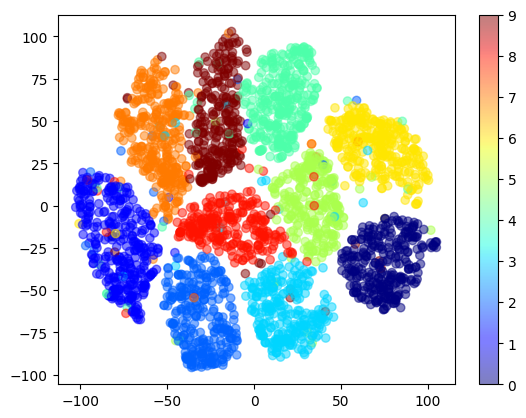

In [52]:
print(X_train_tsne[0:2])
print(y_train[0:2])

# Plot the 2D t-SNE representation of the dataset, with different colors for each digit
X_train_tsne_sample = X_train_tsne[:3000]
y_train_sample = y_train[:3000]
plt.scatter(X_train_tsne_sample[:, 0], X_train_tsne_sample[:, 1], c=y_train_sample.astype(int), cmap='jet', alpha=0.5)
plt.colorbar()

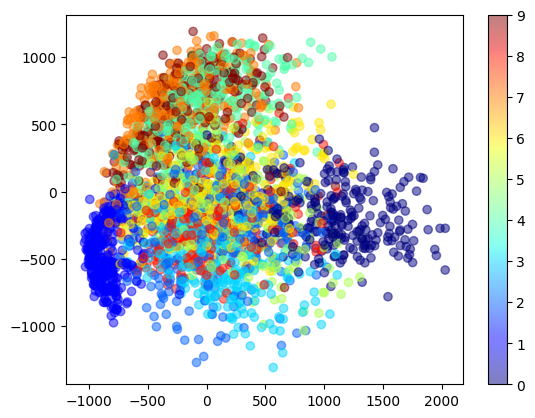

In [55]:
# Reduce the dimensions of the dataset to 2 dimensions using PCA, then plot the 2D representation of the dataset

pca = PCA(n_components=2)
sample_size = 3000
X_train_pca = pca.fit_transform(X_train)
X_train_pca_sample = X_train_pca[:sample_size]
y_train_sample = y_train[:sample_size]
plt.scatter(X_train_pca_sample[:, 0], X_train_pca_sample[:, 1], c=y_train_sample.astype(int), cmap='jet', alpha=0.5)
plt.colorbar()


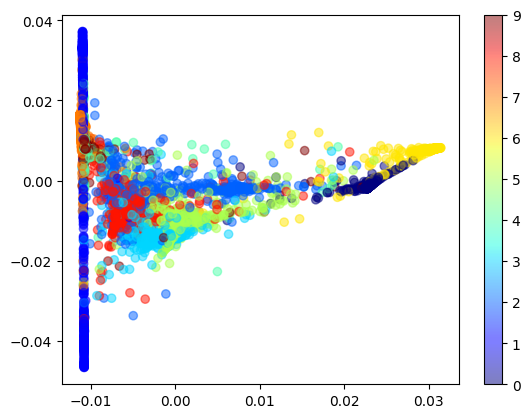

In [8]:
# Use LLE to reduce the dimensions of the dataset to 2 dimensions

from sklearn.manifold import LocallyLinearEmbedding

sample_size = 5000


X_train_lle = LocallyLinearEmbedding(n_components=2).fit_transform(X_train[:sample_size])
X_train_lle_sample = X_train_lle
y_train_sample = y_train[:sample_size]

plt.scatter(X_train_lle_sample[:, 0], X_train_lle_sample[:, 1], c=y_train_sample.astype(int), cmap='jet', alpha=0.5)
plt.colorbar()